In [1]:
!pip install ultralytics opencv-python matplotlib seaborn easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.2/978.2 kB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 16.4 MB/s eta 0:00:00


In [2]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ashmit20s","key":"15e5873eabf6d4978b7bc1e459886749"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d saumyapatel/traffic-vehicles-object-detection


Dataset URL: https://www.kaggle.com/datasets/saumyapatel/traffic-vehicles-object-detection
License(s): unknown
 92% 560M/607M [00:03<00:00, 154MB/s] 
100% 607M/607M [00:03<00:00, 189MB/s]


In [5]:
!kaggle datasets download -d thamizhsterio/indian-license-plates


Dataset URL: https://www.kaggle.com/datasets/thamizhsterio/indian-license-plates
License(s): unknown
 99% 453M/459M [00:01<00:00, 331MB/s]
100% 459M/459M [00:01<00:00, 403MB/s]


In [6]:
!unzip traffic-vehicles-object-detection.zip
!unzip indian-license-plates.zip


Streaming output truncated to the last 5000 lines.
  inflating: indian number plate/Indian Number Plate/KA 29 WM 1178.png  
  inflating: indian number plate/Indian Number Plate/KA 29 WR 2748.png  
  inflating: indian number plate/Indian Number Plate/KA 29 WS 8334.png  
  inflating: indian number plate/Indian Number Plate/KA 29 WX 7652.png  
  inflating: indian number plate/Indian Number Plate/KA 29 XH 7623.png  
  inflating: indian number plate/Indian Number Plate/KA 29 XN 9254.png  
  inflating: indian number plate/Indian Number Plate/KA 29 XU 8441.png  
  inflating: indian number plate/Indian Number Plate/KA 29 XX 9645.png  
  inflating: indian number plate/Indian Number Plate/KA 29 XX 9906.png  
  inflating: indian number plate/Indian Number Plate/KA 29 XY 2728.png  
  inflating: indian number plate/Indian Number Plate/KA 29 XY 6495.png  
  inflating: indian number plate/Indian Number Plate/KA 29 ZF 8039.png  
  inflating: indian number plate/Indian Number Plate/KA 29 ZH 7004.png  


In [7]:
!ls


 in			    'Indian Plates'
 indian-license-plates.zip   kaggle.json
'indian number plate'	     sample_data
'Indian Number Plate'	    'Traffic Dataset'
'indian plates'		     traffic-vehicles-object-detection.zip


In [8]:
!ls "Traffic Dataset"


images	labels


In [9]:
!ls "Traffic Dataset/images"

test  train  val


In [10]:
!ls "Traffic Dataset/labels"

train  val


In [11]:
%%writefile data.yaml
path: Traffic Dataset

train: images/train
val: images/val

nc: 4

names:
  0: car
  1: bus
  2: truck
  3: bike


Writing data.yaml


In [12]:
!cat data.yaml


path: Traffic Dataset

train: images/train
val: images/val

nc: 4

names:
  0: car
  1: bus
  2: truck
  3: bike


In [13]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

model.train(
    data = "data.yaml",
    epochs = 30,
    imgsz = 640,
    batch = 16
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.4.9 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, ker

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b2a662e3c80>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [14]:
!ls "Traffic Dataset/images/val"

'00 (106).jpg'	'00 (179).jpg'	'00 (252).jpg'	'00 (77).jpg'	'11 (2).png'
'00 (107).jpg'	'00 (180).jpg'	'00 (265).jpg'	'00 (78).jpg'	'11 (3).png'
'00 (108).jpg'	'00 (181).jpg'	'00 (266).jpg'	'00 (797).jpg'	'11 (4).png'
'00 (109).jpg'	'00 (182).jpg'	'00 (267).jpg'	'00 (799).jpg'	'11 (5).png'
'00 (110).jpg'	'00 (183).jpg'	'00 (268).jpg'	'00 (79).jpg'	'11 (6).png'
'00 (111).jpg'	'00 (184).jpg'	'00 (269).jpg'	'00 (800).jpg'	'11 (7).png'
'00 (112).jpg'	'00 (185).jpg'	'00 (270).jpg'	'00 (801).jpg'	'11 (8).png'
'00 (113).jpg'	'00 (186).jpg'	'00 (271).jpg'	'00 (802).jpg'	'11 (9).png'
'00 (114).jpg'	'00 (187).jpg'	'00 (272).jpg'	'00 (803).jpg'	 Video10_24.jpg
'00 (115).jpg'	'00 (188).jpg'	'00 (273).jpg'	'00 (805).jpg'	 Video10_25.jpg
'00 (116).jpg'	'00 (189).jpg'	'00 (286).jpg'	'00 (806).jpg'	 Video10_26.jpg
'00 (117).jpg'	'00 (202).jpg'	'00 (287).jpg'	'00 (807).jpg'	 Video10_27.jpg
'00 (130).jpg'	'00 (203).jpg'	'00 (288).jpg'	'00 (809).jpg'	 Video10_28.jpg
'00 (131).jpg'	'00 (204).jpg'	'00 (289)

In [15]:
model.predict(
    source="Traffic Dataset/images/test",
    save=True,
    conf=0.5,
    stream=True,
    max_det=10
)


<generator object BasePredictor.stream_inference at 0x7b2bb1cf5ea0>

In [16]:
!ls runs/detect


train


In [17]:
!ls runs/detect/predict


ls: cannot access 'runs/detect/predict': No such file or directory


In [18]:
import pandas as pd

results = pd.read_csv("runs/detect/train/results.csv")
print(results.columns)


Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


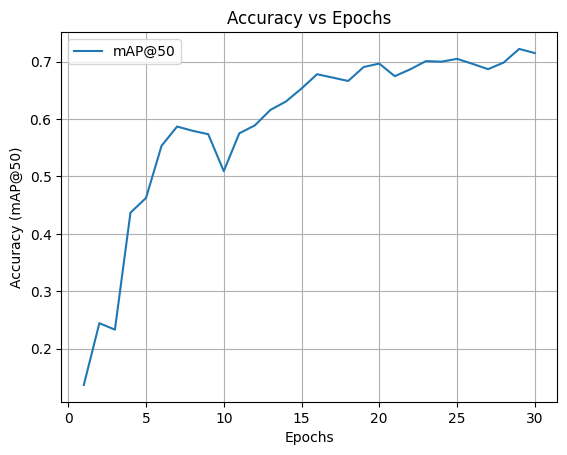

In [19]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(results["epoch"], results["metrics/mAP50(B)"], label="mAP@50")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (mAP@50)")
plt.title("Accuracy vs Epochs")
plt.legend()
plt.grid(True)
plt.show()


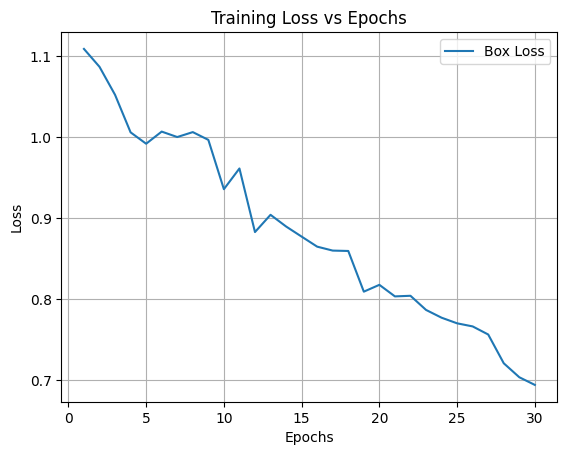

In [20]:
plt.figure()
plt.plot(results["epoch"], results["train/box_loss"], label="Box Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Epochs")
plt.legend()
plt.grid(True)
plt.show()


In [21]:
print(results.columns)


Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


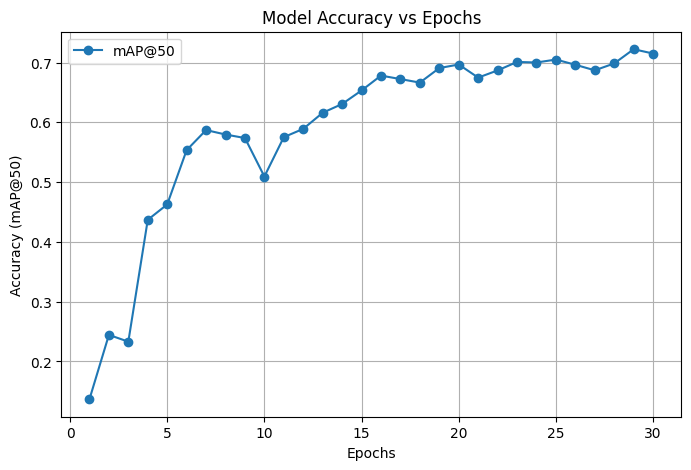

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(
    results["epoch"],
    results["metrics/mAP50(B)"],
    marker="o",
    label="mAP@50"
)

plt.xlabel("Epochs")
plt.ylabel("Accuracy (mAP@50)")
plt.title("Model Accuracy vs Epochs")
plt.legend()
plt.grid(True)
plt.show()


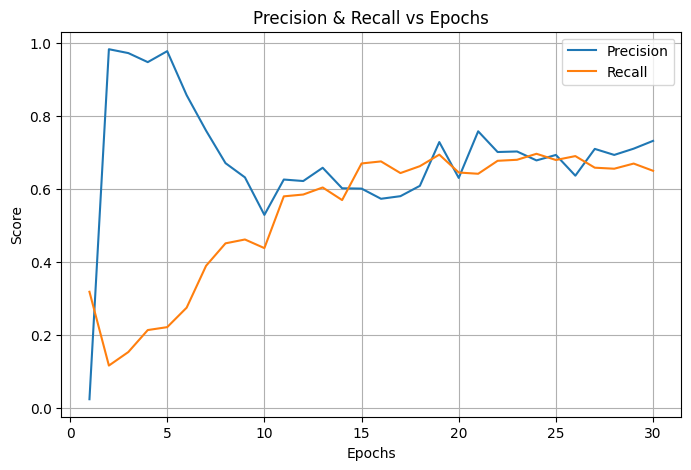

In [23]:
plt.figure(figsize=(8,5))
plt.plot(results["epoch"], results["metrics/precision(B)"], label="Precision")
plt.plot(results["epoch"], results["metrics/recall(B)"], label="Recall")

plt.xlabel("Epochs")
plt.ylabel("Score")
plt.title("Precision & Recall vs Epochs")
plt.legend()
plt.grid(True)
plt.show()


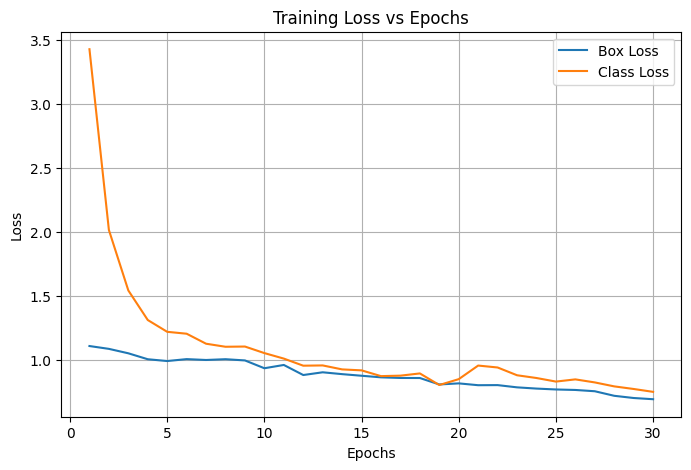

In [24]:
plt.figure(figsize=(8,5))
plt.plot(results["epoch"], results["train/box_loss"], label="Box Loss")
plt.plot(results["epoch"], results["train/cls_loss"], label="Class Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Epochs")
plt.legend()
plt.grid(True)
plt.show()


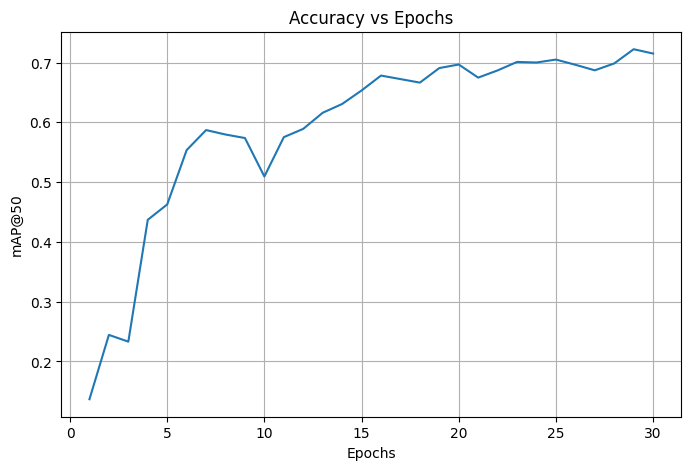

In [25]:
plt.figure(figsize=(8,5))
plt.plot(results["epoch"], results["metrics/mAP50(B)"])
plt.xlabel("Epochs")
plt.ylabel("mAP@50")
plt.title("Accuracy vs Epochs")
plt.grid(True)
plt.savefig("accuracy_vs_epochs.png")
plt.show()


(np.float64(-0.5), np.float64(2999.5), np.float64(2249.5), np.float64(-0.5))

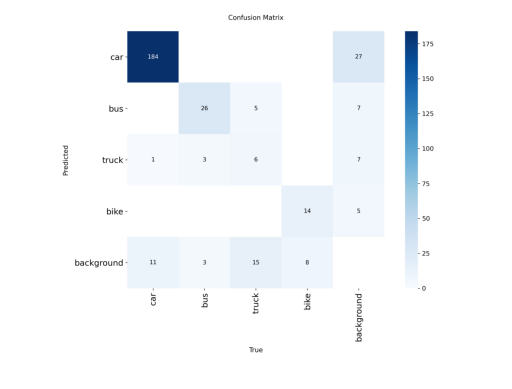

In [26]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("runs/detect/train/confusion_matrix.png")
plt.imshow(img)
plt.axis("off")


In [27]:
from ultralytics import YOLO
import os

model = YOLO("runs/detect/train/weights/best.pt")

results = model.predict(
    source="Traffic Dataset/images/test/*.jpg",
    conf=0.5,
    stream=True
)


In [28]:
image_vehicle_count = {}

for r in results:
    image_name = os.path.basename(r.path)
    count = len(r.boxes)
    image_vehicle_count[image_name] = count

image_vehicle_count



image 1/160 /content/Traffic Dataset/images/test/00 (174).jpg: 384x640 5 cars, 1 truck, 37.8ms
image 2/160 /content/Traffic Dataset/images/test/00 (175).jpg: 384x640 5 cars, 1 truck, 5.8ms
image 3/160 /content/Traffic Dataset/images/test/00 (176).jpg: 384x640 5 cars, 8.7ms
image 4/160 /content/Traffic Dataset/images/test/00 (177).jpg: 384x640 5 cars, 1 truck, 9.8ms
image 5/160 /content/Traffic Dataset/images/test/00 (178).jpg: 384x640 5 cars, 1 truck, 5.9ms
image 6/160 /content/Traffic Dataset/images/test/00 (179).jpg: 384x640 4 cars, 5.9ms
image 7/160 /content/Traffic Dataset/images/test/00 (180).jpg: 384x640 4 cars, 1 truck, 5.7ms
image 8/160 /content/Traffic Dataset/images/test/00 (181).jpg: 384x640 4 cars, 7.1ms
image 9/160 /content/Traffic Dataset/images/test/00 (182).jpg: 384x640 4 cars, 5.6ms
image 10/160 /content/Traffic Dataset/images/test/00 (183).jpg: 384x640 1 car, 1 bike, 5.6ms
image 11/160 /content/Traffic Dataset/images/test/00 (184).jpg: 384x640 1 bike, 6.0ms
image 12/

{'00 (174).jpg': 6,
 '00 (175).jpg': 6,
 '00 (176).jpg': 5,
 '00 (177).jpg': 6,
 '00 (178).jpg': 6,
 '00 (179).jpg': 4,
 '00 (180).jpg': 5,
 '00 (181).jpg': 4,
 '00 (182).jpg': 4,
 '00 (183).jpg': 2,
 '00 (184).jpg': 1,
 '00 (185).jpg': 2,
 '00 (186).jpg': 0,
 '00 (187).jpg': 3,
 '00 (188).jpg': 3,
 '00 (189).jpg': 3,
 '00 (190).jpg': 1,
 '00 (191).jpg': 0,
 '00 (192).jpg': 1,
 '00 (193).jpg': 1,
 '00 (194).jpg': 1,
 '00 (195).jpg': 2,
 '00 (196).jpg': 1,
 '00 (197).jpg': 3,
 '00 (198).jpg': 1,
 '00 (199).jpg': 3,
 '00 (200).jpg': 3,
 '00 (201).jpg': 1,
 '00 (202).jpg': 0,
 '00 (203).jpg': 0,
 '00 (204).jpg': 1,
 '00 (205).jpg': 1,
 '00 (206).jpg': 3,
 '00 (207).jpg': 1,
 '00 (208).jpg': 3,
 '00 (209).jpg': 1,
 '00 (210).jpg': 1,
 '00 (211).jpg': 2,
 '00 (212).jpg': 1,
 '00 (213).jpg': 1,
 '00 (214).jpg': 3,
 '00 (215).jpg': 12,
 '00 (216).jpg': 13,
 '00 (217).jpg': 15,
 '00 (218).jpg': 13,
 '00 (219).jpg': 13,
 '00 (220).jpg': 12,
 '00 (221).jpg': 13,
 '00 (222).jpg': 11,
 '00 (223).j

In [29]:
import pandas as pd

density_df = pd.DataFrame(
    image_vehicle_count.items(),
    columns=["Image", "Vehicle_Count"]
)

density_df


,Image,Vehicle_Count
0,00 (174).jpg,6
1,00 (175).jpg,6
2,00 (176).jpg,5
3,00 (177).jpg,6
4,00 (178).jpg,6
...,...,...
155,00 (392).jpg,0
156,00 (393).jpg,0
157,00 (394).jpg,1
158,00 (395).jpg,0


In [30]:
density_df.to_csv("traffic_density.csv", index=False)


In [31]:
def signal_time(vehicle_count):
    if vehicle_count <= 10:
        return 30
    elif vehicle_count <= 20:
        return 45
    else:
        return 60


In [32]:
density_df["Green_Time_sec"] = density_df["Vehicle_Count"].apply(signal_time)
density_df


,Image,Vehicle_Count,Green_Time_sec
0,00 (174).jpg,6,30
1,00 (175).jpg,6,30
2,00 (176).jpg,5,30
3,00 (177).jpg,6,30
4,00 (178).jpg,6,30
...,...,...,...
155,00 (392).jpg,0,30
156,00 (393).jpg,0,30
157,00 (394).jpg,1,30
158,00 (395).jpg,0,30


In [33]:
density_df.to_csv("traffic_signal_decisions.csv", index=False)


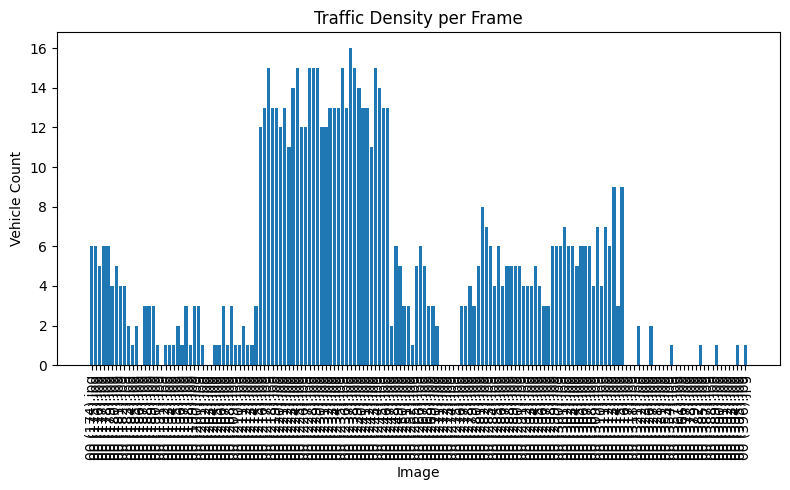

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(density_df["Image"], density_df["Vehicle_Count"])
plt.xticks(rotation=90)
plt.xlabel("Image")
plt.ylabel("Vehicle Count")
plt.title("Traffic Density per Frame")
plt.tight_layout()
plt.show()


In [35]:
import easyocr

reader = easyocr.Reader(['en'])


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [36]:
!ls



 accuracy_vs_epochs.png      runs
 data.yaml		     sample_data
 in			    'Traffic Dataset'
 indian-license-plates.zip   traffic_density.csv
'indian number plate'	     traffic_signal_decisions.csv
'Indian Number Plate'	     traffic-vehicles-object-detection.zip
'indian plates'		     yolo26n.pt
'Indian Plates'		     yolov8n.pt
 kaggle.json


In [37]:
!ls "Indian Plates"


positive


In [38]:
!ls "Indian Plates/positive"


Audi-A4-528794d.jpg_0359_0305_0250_0204_0066.png
Audi-A6-528818b.jpg_0000_0311_0286_0189_0044.png
BMW-3-Series-528819e.jpg_0000_0310_0268_0192_0061.png
BMW-5-Series-524359c.jpg_0000_0065_0186_0121_0058.png
BMW-X1-528026e.jpg_0016_0384_0220_0114_0037.png
BMW-X5-528820c.jpg_0000_0316_0245_0160_0037.png
Chevrolet-Aveo-521114c.jpg_0004_0365_0346_0224_0065.png
Chevrolet-Aveo-526315c.jpg_0357_0270_0361_0249_0087.png
Chevrolet-Aveo-528299d.jpg_0000_0218_0236_0170_0052.png
Chevrolet-Aveo-Old-523643b.jpg_0000_0084_0145_0087_0023.png
Chevrolet-Aveo-U-VA-524364c.jpg_0358_0273_0356_0254_0059.png
Chevrolet-Aveo-U-VA-527747c.jpg_0352_0186_0301_0166_0060.png
Chevrolet-Aveo-U-VA-528435c.jpg_0350_0204_0276_0165_0058.png
Chevrolet-Aveo-U-VA-528838b.jpg_0000_0339_0260_0119_0027.png
Chevrolet-Beat-514297d.jpg_0000_0192_0195_0128_0036.png
Chevrolet-Beat-518452c.jpg_0000_0215_0515_0264_0070.png
Chevrolet-Beat-519533c.jpg_0006_0402_0386_0232_0067.png
Chevrolet-Beat-519533g.jpg_0002_0313_0493_0229_0053.png
Ch

In [39]:
import os
import cv2
import matplotlib.pyplot as plt

plate_dir = "Indian Plates/positive"
image_name = os.listdir(plate_dir)[0]   # pick first image safely
img_path = os.path.join(plate_dir, image_name)

img = cv2.imread(img_path)

print("Loaded image:", image_name)
print("Image shape:", img.shape)


Loaded image: Hyundai-i10-522757b.jpg_0000_0299_0536_0251_0053.png
Image shape: (53, 251, 3)


(np.float64(-0.5), np.float64(250.5), np.float64(52.5), np.float64(-0.5))

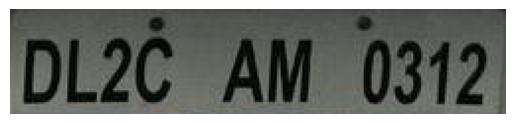

In [40]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")


In [41]:
import easyocr

reader = easyocr.Reader(['en'])
result = reader.readtext(img)

for r in result:
    print("Detected Plate:", r[1])


Detected Plate: DL2C
Detected Plate: AM
Detected Plate: 0312


In [42]:
img = cv2.imread(img_path)
if img is None:
    print("Image not found or unreadable")
else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


In [43]:
import os
import cv2
import pandas as pd
import easyocr

reader = easyocr.Reader(['en'])

plate_dir = "Indian Plates/positive"
ocr_results = []

for img_name in os.listdir(plate_dir):
    img_path = os.path.join(plate_dir, img_name)
    img = cv2.imread(img_path)

    if img is None:
        continue

    result = reader.readtext(img)

    if len(result) == 0:
        ocr_results.append([img_name, "NOT_DETECTED"])
    else:
        detected_text = " ".join([r[1] for r in result])
        ocr_results.append([img_name, detected_text])

ocr_df = pd.DataFrame(ocr_results, columns=["Image", "Detected_Plate"])
ocr_df.head()


,Image,Detected_Plate
0,Hyundai-i10-522757b.jpg_0000_0299_0536_0251_00...,DL2C AM 0312
1,Maruti-Suzuki-Swift-Dzire-527180b.jpg_0331_008...,MhOLeQ1486|
2,Maruti-Suzuki-SX4-524748c.jpg_0000_0288_0301_0...,H132 Hz.4414
3,Hyundai-i10-521281c.jpg_0000_0306_0503_0189_00...,WB O6B 6052
4,Maruti-Suzuki-Swift-522747c.jpg_0000_0013_0386...,DLecs 75604


In [44]:
ocr_df.to_csv("ocr_results.csv", index=False)


In [45]:
total_images = len(ocr_df)
detected = (ocr_df["Detected_Plate"] != "NOT_DETECTED").sum()

print("Total Images:", total_images)
print("Detected Plates:", detected)
print("OCR Detection Rate:", detected / total_images)


Total Images: 1182
Detected Plates: 1124
OCR Detection Rate: 0.9509306260575296


In [46]:
stolen_data = {
    "Detected_Plate": [
        ocr_df["Detected_Plate"].iloc[0],
        ocr_df["Detected_Plate"].iloc[1]
    ],
    "Stolen_Status": ["Yes", "No"]
}

stolen_df = pd.DataFrame(stolen_data)
stolen_df


,Detected_Plate,Stolen_Status
0,DL2C AM 0312,Yes
1,MhOLeQ1486|,No


In [47]:
final_df = ocr_df.merge(stolen_df, on="Detected_Plate", how="left")
final_df["Stolen_Status"] = final_df["Stolen_Status"].fillna("No")
final_df.head()


,Image,Detected_Plate,Stolen_Status
0,Hyundai-i10-522757b.jpg_0000_0299_0536_0251_00...,DL2C AM 0312,Yes
1,Maruti-Suzuki-Swift-Dzire-527180b.jpg_0331_008...,MhOLeQ1486|,No
2,Maruti-Suzuki-SX4-524748c.jpg_0000_0288_0301_0...,H132 Hz.4414,No
3,Hyundai-i10-521281c.jpg_0000_0306_0503_0189_00...,WB O6B 6052,No
4,Maruti-Suzuki-Swift-522747c.jpg_0000_0013_0386...,DLecs 75604,No


In [48]:
stolen_vehicles = final_df[final_df["Stolen_Status"] == "Yes"]
stolen_vehicles


,Image,Detected_Plate,Stolen_Status
0,Hyundai-i10-522757b.jpg_0000_0299_0536_0251_00...,DL2C AM 0312,Yes


In [49]:
final_df["State_Code"] = final_df["Detected_Plate"].str[:2]
final_df.head()


,Image,Detected_Plate,Stolen_Status,State_Code
0,Hyundai-i10-522757b.jpg_0000_0299_0536_0251_00...,DL2C AM 0312,Yes,DL
1,Maruti-Suzuki-Swift-Dzire-527180b.jpg_0331_008...,MhOLeQ1486|,No,Mh
2,Maruti-Suzuki-SX4-524748c.jpg_0000_0288_0301_0...,H132 Hz.4414,No,H1
3,Hyundai-i10-521281c.jpg_0000_0306_0503_0189_00...,WB O6B 6052,No,WB
4,Maruti-Suzuki-Swift-522747c.jpg_0000_0013_0386...,DLecs 75604,No,DL


In [50]:
state_counts = final_df["State_Code"].value_counts()
state_counts


,count
State_Code,
MH,256
DL,111
AP,82
NO,58
WB,51
...,...
42,1
;,1
7n,1


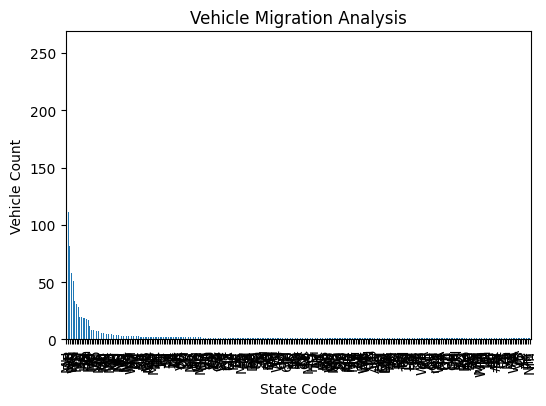

In [51]:
import matplotlib.pyplot as plt

state_counts.plot(kind="bar", figsize=(6,4))
plt.xlabel("State Code")
plt.ylabel("Vehicle Count")
plt.title("Vehicle Migration Analysis")
plt.show()


In [52]:
fuel_types = ["Petrol", "Diesel", "EV"]

final_df["Fuel_Type"] = [
    fuel_types[i % 3] for i in range(len(final_df))
]

final_df.head()


,Image,Detected_Plate,Stolen_Status,State_Code,Fuel_Type
0,Hyundai-i10-522757b.jpg_0000_0299_0536_0251_00...,DL2C AM 0312,Yes,DL,Petrol
1,Maruti-Suzuki-Swift-Dzire-527180b.jpg_0331_008...,MhOLeQ1486|,No,Mh,Diesel
2,Maruti-Suzuki-SX4-524748c.jpg_0000_0288_0301_0...,H132 Hz.4414,No,H1,EV
3,Hyundai-i10-521281c.jpg_0000_0306_0503_0189_00...,WB O6B 6052,No,WB,Petrol
4,Maruti-Suzuki-Swift-522747c.jpg_0000_0013_0386...,DLecs 75604,No,DL,Diesel


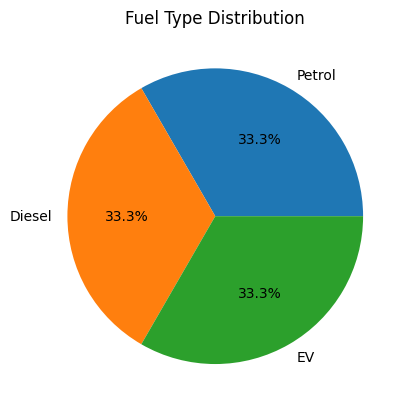

In [53]:
final_df["Fuel_Type"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    title="Fuel Type Distribution"
)
plt.ylabel("")
plt.show()
